In [ ]:
# 6/22/23 edit: add goes plots for 2022 data cases here!
import os
os.chdir("/Users/etmu9498/research/code/scripts/")
import goes_gifs_2023_update

goes_gifs_2023_update.simple_wrapper( dataset, year=2021, channel='CMI_C13')

In [2]:
## last edited: 5/27/22
## Status: Fixed path names to match new directory structure. 
##         Makes pretty simple cartopy plots of flight paths

import os
import datetime 
import warnings

import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.feature as cfeature
 
os.chdir(  "/Users/etmu9498/research/code/scripts")
import make_plots
import helper_fns

In [3]:
# 2022 data
crl_path = "/Users/etmu9498/research/data/CRL_data/2022"
crl_list = make_plots.load_crl( crl_path, print_files=True)


crl data files:
0) aircraft.P3.20220901H1_0_10.CRL.cdf
1) aircraft.P3.20220901H1_1_10.CRL.cdf
2) aircraft.P3.20220903H1_0_27.CRL.cdf
3) aircraft.P3.20220903H1_2_27.CRL.cdf
4) aircraft.P3.20220904H1_0_22.CRL.cdf
5) aircraft.P3.20220906H1_0_27.CRL.cdf
6) aircraft.P3.20220908H1_0_18.CRL.cdf
7) aircraft.P3.20220916H1_1_20.CRL.cdf
8) aircraft.P3.20220917H1_0_26.CRL.cdf
9) aircraft.P3.20220925H1_0_16.CRL.cdf
10) aircraft.P3.20220927H1_1_19.CRL.cdf
11) aircraft.P3.20221007H1_0_18.CRL.cdf
12) aircraft.P3.20221007H1_1_18.CRL.cdf
13) aircraft.P3.20221008H1_0_21.CRL.cdf
14) aircraft.P3.20221008H1_2_21.CRL.cdf
15) P3_20220830H1_093003-124534.cdf
16) P3_20220831H1_081201-092350.cdf
17) P3_20220831H1_093603-103552.cdf
18) P3_20220831H1_103603-112958.cdf
19) P3_20220831H1_113003-121154.cdf
20) P3_20220901H1_075405-082954.cdf
21) P3_20220901H1_094504-101152.cdf
22) P3_20220901H1_101201-111758.cdf
23) P3_20220901H1_111801-115950.cdf
24) P3_20220903H1_100000-105022.cdf
25) P3_20220904H1_102402-113553.cd

data loaded
track 0 added
track 1 added
track 2 added
track 3 added
track 4 added
track 5 added


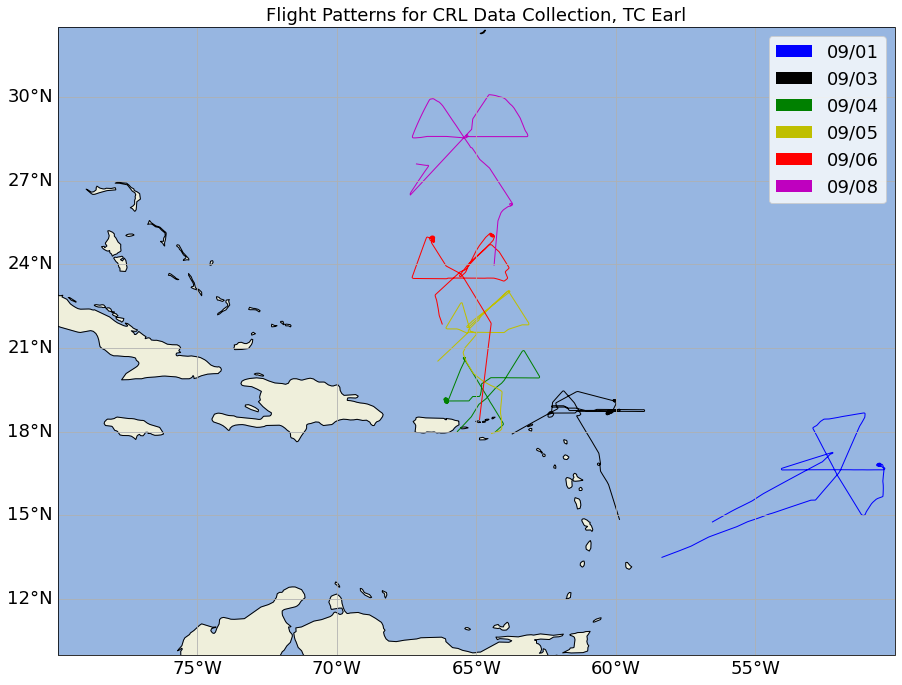

In [5]:
# crl flight path: TC Earl
helper_fns.change_font_sizes( 18, 18)

# get and open datasets
os.chdir(crl_path)
crl_data0 = xr.open_dataset( crl_list[0])
crl_data2 = xr.open_dataset( crl_list[2])
crl_data4 = xr.open_dataset( crl_list[4])
crl_data5 = xr.open_dataset( crl_list[5])
crl_data6 = xr.open_dataset( crl_list[6])

crl_data0905 = xr.open_dataset( crl_list[ 27])

print( 'data loaded')


# make figure
fig = plt.figure( figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-80, -50, 10, 32.5], crs=ccrs.PlateCarree())

gl = ax.gridlines( draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)


# cycle through cases and display locations!
colors = ['b', 'k', 'g', 'y', 'r', 'm']
data_list = [ crl_data0, crl_data2, crl_data4, crl_data0905, crl_data5, crl_data6]
labels = [ '09/01', '09/03', '09/04', '09/05', '09/06', '09/08' ]

for i in range( len( data_list)):
    crl_data = data_list[ i]

    lat = crl_data.Lat 
    lon = crl_data.Lon

    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[i])                          

    print( 'track ' + str( i) + ' added')


r = [ 
    mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k"),
    mpatches.Rectangle((0, 0), 1, 1, facecolor="g"), mpatches.Rectangle((0, 0), 1, 1, facecolor="y"),
    mpatches.Rectangle((0, 0), 1, 1, facecolor="r"),
    mpatches.Rectangle((0, 0), 1, 1, facecolor="m") ]

ax.legend( r, labels)

ax.set_title( "Flight Patterns for CRL Data Collection, TC Earl")
ax.set_xlabel( "Longitude (Degrees)")
ax.set_ylabel( "Latitude (Degrees)")
plt.show()


data loaded
track 0 added
track 1 added
track 2 added
track 3 added


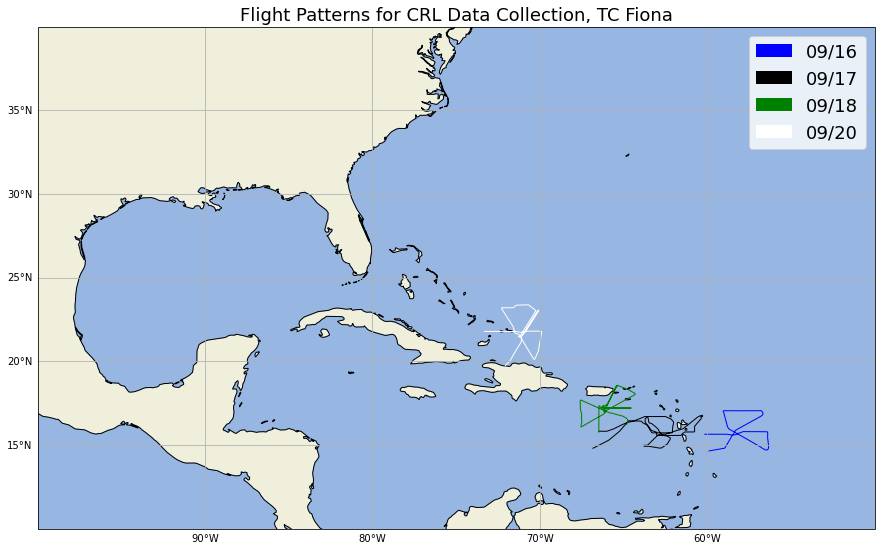

In [4]:
# crl flight path: TC Fiona
helper_fns.change_font_sizes( 18, 18)

# get and open datasets
os.chdir(crl_path)
crl_data7 = xr.open_dataset( crl_list[7])
crl_data8 = xr.open_dataset( crl_list[8])
crl_data47 = xr.open_dataset( crl_list[47])
crl_data51 = xr.open_dataset( crl_list[51])


print( 'data loaded')


# make figure
fig = plt.figure( figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# normal view
ax.set_extent([-100, -50, 10, 40], crs=ccrs.PlateCarree())
# zoom on 9/18
# ax.set_extent([-68, -62, 15, 20], crs=ccrs.PlateCarree())

gl = ax.gridlines( draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)


# cycle through cases and display locations!
colors = ['b', 'k', 'g', 'w']
data_list = [ crl_data7, crl_data8, crl_data47, crl_data51]
labels = [ '09/16', '09/17', '09/18', '09/20' ]

for i in range( len( data_list)):
    crl_data = data_list[ i]

    lat = crl_data.Lat 
    lon = crl_data.Lon

    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[i])                          

    print( 'track ' + str( i) + ' added')


r = [ 
    mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k"),
    mpatches.Rectangle((0, 0), 1, 1, facecolor="g"), mpatches.Rectangle((0, 0), 1, 1, facecolor="w")]

ax.legend( r, labels)

ax.set_title( "Flight Patterns for CRL Data Collection, TC Fiona")
ax.set_xlabel( "Longitude (Degrees)")
ax.set_ylabel( "Latitude (Degrees)")



# add some colored line segments to show p-3 location + direction
# print( len( crl_data47.Lat))
'''
i1 = 1200
i2 = 1400
i3 = 1400
i4 = 1800

track = sgeom.LineString(zip(crl_data47.Lon[i1:i2], crl_data47.Lat[i1:i2]))
ax.add_geometries([track], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='b', linewidth=3)                          

track = sgeom.LineString(zip(crl_data47.Lon[i3:i4], crl_data47.Lat[i3:i4]))
ax.add_geometries([track], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='k', linewidth=3)                          
'''

plt.show()


data loaded
track 0 added
track 1 added
track 2 added


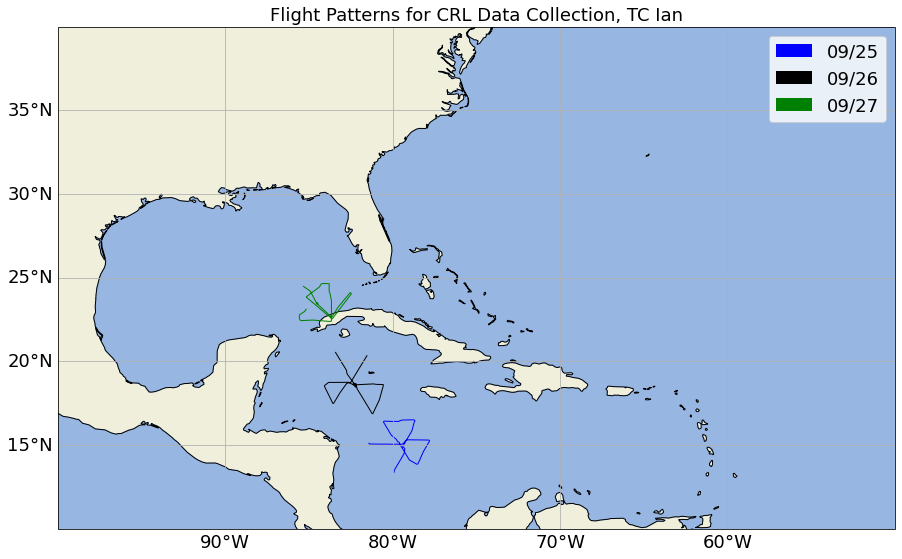

In [16]:
# crl flight path: TC Ian
helper_fns.change_font_sizes( 18, 18)

# get and open datasets
os.chdir(crl_path)
crl_data58 = xr.open_dataset( crl_list[58])
crl_data60 = xr.open_dataset( crl_list[60])
crl_data10 = xr.open_dataset( crl_list[10])

print( 'data loaded')


# make figure
fig = plt.figure( figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-100, -50, 10, 40], crs=ccrs.PlateCarree())

gl = ax.gridlines( draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)


# cycle through cases and display locations!
colors = ['b', 'k', 'g']
data_list = [ crl_data58, crl_data60, crl_data10 ]
labels = [ '09/25', "09/26", "09/27"]

for i in range( len( data_list)):
    crl_data = data_list[ i]

    lat = crl_data.Lat 
    lon = crl_data.Lon

    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[i])                          

    print( 'track ' + str( i) + ' added')


r = [ 
    mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k"),
    mpatches.Rectangle((0, 0), 1, 1, facecolor="g")]

ax.legend( r, labels)

ax.set_title( "Flight Patterns for CRL Data Collection, TC Ian")
ax.set_xlabel( "Longitude (Degrees)")
ax.set_ylabel( "Latitude (Degrees)")
plt.show()


data loaded
track 0 added
track 1 added


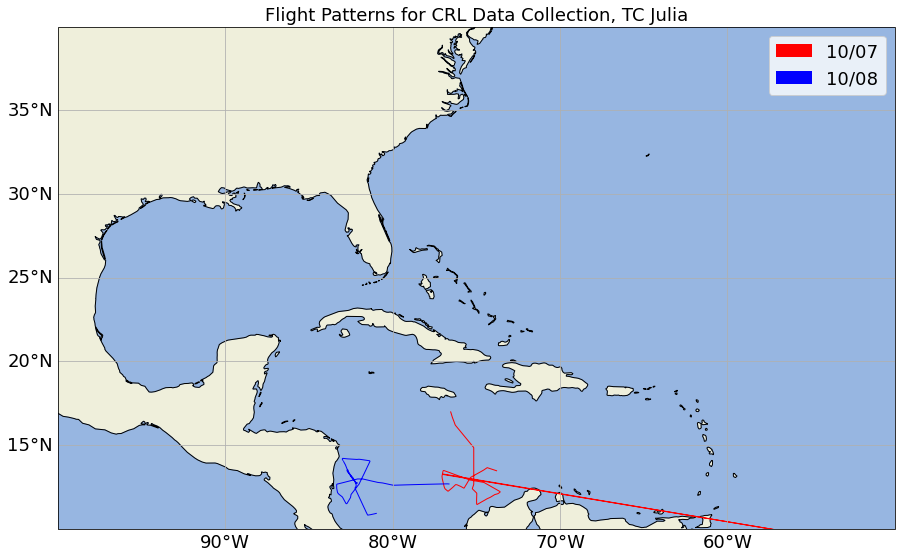

In [17]:
# crl flight path: TC Julia
helper_fns.change_font_sizes( 18, 18)

# get and open datasets
os.chdir(crl_path)
crl_data11 = xr.open_dataset( crl_list[11])
crl_data13 = xr.open_dataset( crl_list[13])

print( 'data loaded')


# make figure
fig = plt.figure( figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([-100, -50, 10, 40], crs=ccrs.PlateCarree())

gl = ax.gridlines( draw_labels=True)
gl.top_labels = False
gl.right_labels = False

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)


# cycle through cases and display locations!
colors = ['r', 'b']
data_list = [ crl_data11, crl_data13 ]
labels = [ '10/07', "10/08"]

for i in range( len( data_list)):
    crl_data = data_list[ i]

    lat = crl_data.Lat 
    lon = crl_data.Lon

    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[i])                          
    print( 'track ' + str( i) + ' added')


r = [ 
    mpatches.Rectangle((0, 0), 1, 1, facecolor="r"), mpatches.Rectangle((0, 0), 1, 1, facecolor="b") ]

ax.legend( r, labels)

ax.set_title( "Flight Patterns for CRL Data Collection, TC Julia")
ax.set_xlabel( "Longitude (Degrees)")
ax.set_ylabel( "Latitude (Degrees)")
plt.show()


In [31]:
# testing scripts for loading data
crl_path = "/Users/etmu9498/research/data/CRL_data/2021"
tdr_path = "/Users/etmu9498/research/data/tdr/sam/nc-files"

tdr_list = make_plots.load_tdr( tdr_path, print_files=False)
crl_list = make_plots.load_crl( crl_path, print_files=False)

os.chdir( crl_path)

crl data files:
0) P3_20210811H1_200000-224759.cdf
1) P3_20210812H1_095513-125927.cdf
2) P3_20210812H2_212248-235510.cdf
3) P3_20210813H1_091801-113558.cdf
4) P3_20210816H1_085245-123459.cdf
5) P3_20210816H1_090000-102359.cdf
6) P3_20210817H1_094204-132058.cdf
7) P3_20210818H1_211425-244159.cdf
8) P3_20210819H1_213003-244159.cdf
9) P3_20210820H1_212402-245958.cdf
10) P3_20210821H2_213903-225658.cdf
11) P3_20210821H2_213903-262058.cdf
12) P3_20210827H1_203112-275220.cdf
13) P3_20210828H1_200115-221321.cdf
14) P3_20210829H1_171201-223719.cdf
15) P3_20210925H1_211201-243558.cdf
16) P3_20210926H1_220900-255058.cdf
17) P3_20210927H1_213003-253558.cdf
18) P3_20210929H2_211201-261159.cdf


data loaded
track added


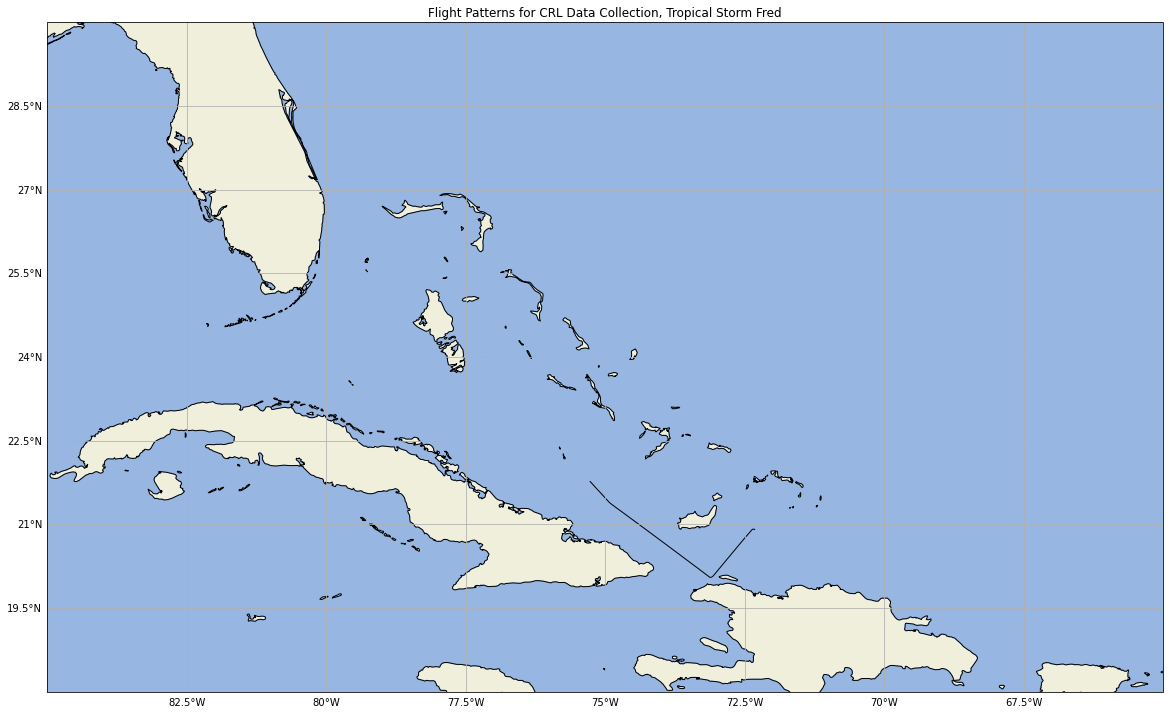

In [36]:
# crl flight path figure Fred

def main():
    fig = plt.figure( figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_extent([-85, -65, 18, 30], crs=ccrs.PlateCarree())

    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g', 'w']
    
    crl_data1 = xr.open_dataset( crl_list[0])
    crl_data2 = xr.open_dataset( crl_list[1])
    crl_data3 = xr.open_dataset( crl_list[2])
    crl_data4 = xr.open_dataset( crl_list[3])
    
    print( 'data loaded')

    
    ind1 = 0
    ind2 = 1650

    i = 1
    
    # for i in range(4):    
    os.chdir( crl_path)
    crl_data = xr.open_dataset( crl_list[ i])
    lat = crl_data.Lat[ ind1 : ind2] 
    lon = crl_data.Lon[ ind1 : ind2]
    track = sgeom.LineString(zip(lon, lat))
    ax.add_geometries([track], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[i])                          
    
    print( 'track added')
    
    # r = [ 
    #     mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k"),
    #     mpatches.Rectangle((0, 0), 1, 1, facecolor="g"), mpatches.Rectangle((0, 0), 1, 1, facecolor="w") ]
    
    
    # labels = ['flight 8/11', 'flight 8/12 part 1', 'flight 8/12 part 2', 'flight 8/13']
    # ax.legend( r, labels)
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Tropical Storm Fred")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

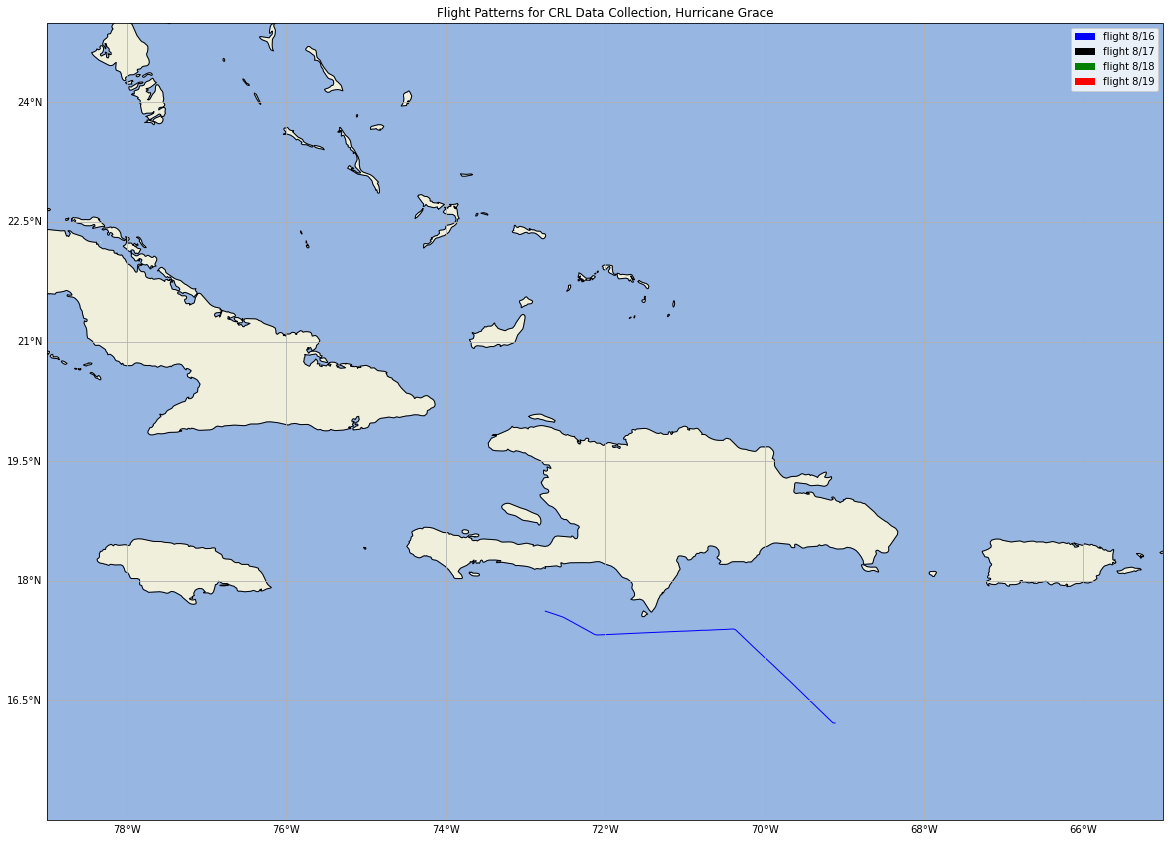

In [14]:
# crl flight path figure Grace

def main():
    fig = plt.figure( figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # ax.set_extent([-98, -78, 12, 25], crs=ccrs.PlateCarree())
    # ax.set_extent([-87.5, -82.5, 18, 22], crs=ccrs.PlateCarree())
    ax.set_extent([-79, -65, 15, 25], crs=ccrs.PlateCarree())

    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g', 'w']
    # plot all three flight paths
    os.chdir( crl_path)
    
    crl_data16 = xr.open_dataset( crl_list[4])
    crl_data17 = xr.open_dataset( crl_list[6])
    crl_data18 = xr.open_dataset( crl_list[7])
    crl_data19 = xr.open_dataset( crl_list[8])

    lat16 = crl_data16.Lat[3000:4700] # [5000:6600]
    lon16 = crl_data16.Lon[3000:4700] # [5000:6600]    
    track16 = sgeom.LineString(zip(lon16, lat16))
    ax.add_geometries([track16], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[0])                          
  
    '''
    lat17 = crl_data17.Lat
    lon17 = crl_data17.Lon    
    track17 = sgeom.LineString(zip(lon17, lat17))
    ax.add_geometries([track17], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[1])                          
   
    lat18 = crl_data18.Lat[3570:3655]
    lon18 = crl_data18.Lon[3570:3655]   
    track18 = sgeom.LineString(zip(lon18, lat18))
    ax.add_geometries([track18], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[2])                          
    
    
    lat19 = crl_data19.Lat[2100:3350]
    lon19 = crl_data19.Lon[2100:3350]    
    track19 = sgeom.LineString(zip(lon19, lat19))
    ax.add_geometries([track19], ccrs.PlateCarree(),
                      facecolor='none', edgecolor='r')                          
    '''

    r = [ 
        mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k"),
        mpatches.Rectangle((0, 0), 1, 1, facecolor="g"), mpatches.Rectangle((0, 0), 1, 1, facecolor="r") ]
    
    
    labels = ['flight 8/16', 'flight 8/17', 'flight 8/18', 'flight 8/19']
    ax.legend( r, labels)
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Hurricane Grace")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

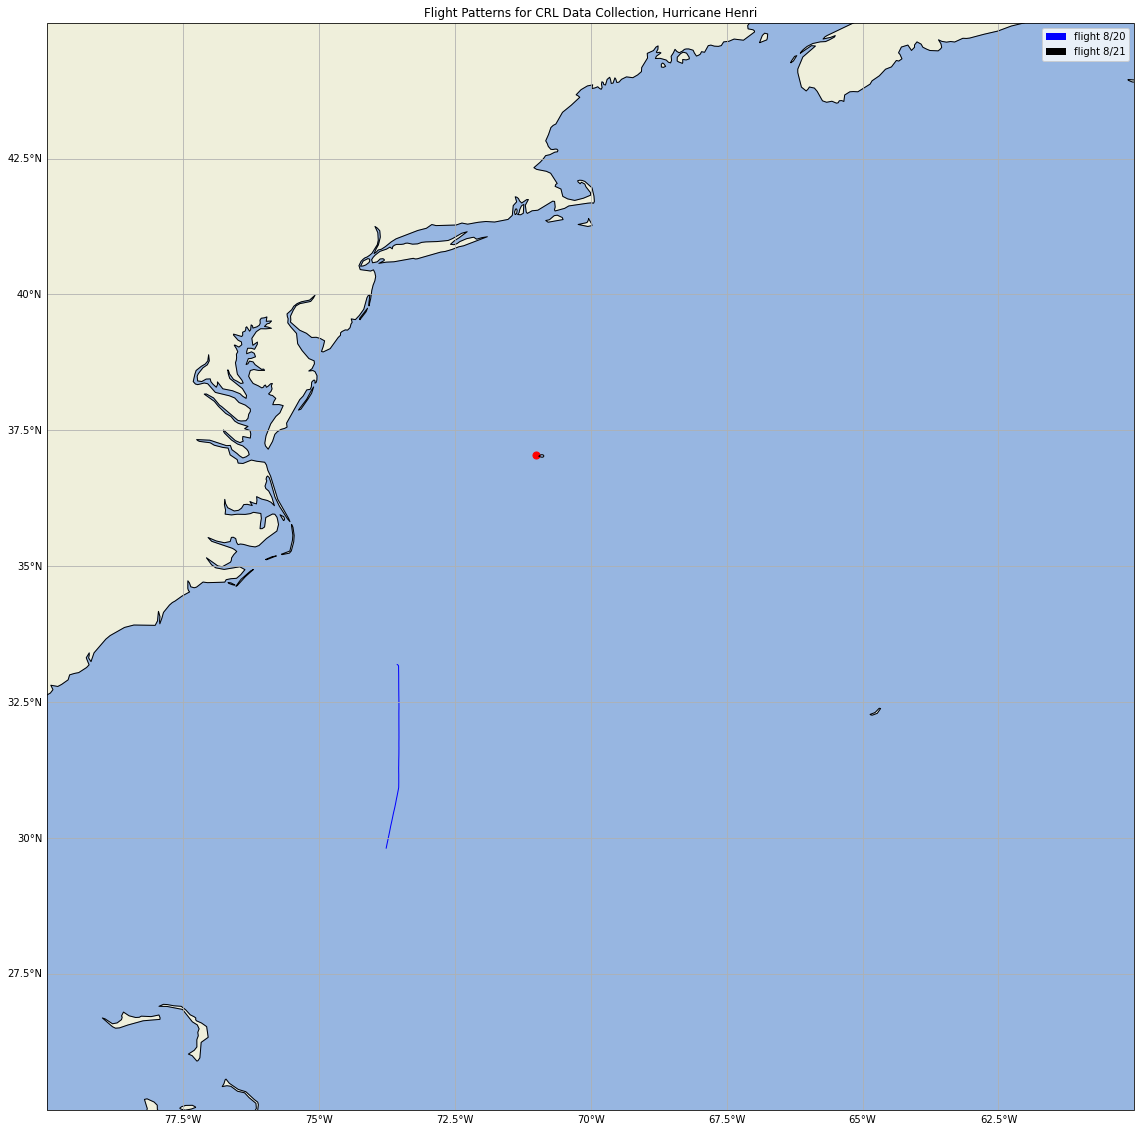

In [17]:
# crl flight path figure Henri

def main():
    fig = plt.figure( figsize=(20, 20))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_extent([-80, -60, 25, 45], crs=ccrs.PlateCarree())

    # zoom in on 8/21 spiral
    # ax.set_extent([-72, -70, 36.5, 37.5], crs=ccrs.PlateCarree())

    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g', 'w']
    # plot all three flight paths
    os.chdir( crl_path)
    
    crl_data20 = xr.open_dataset( crl_list[9])
    crl_data21 = xr.open_dataset( crl_list[11])

    lat20 = crl_data20.Lat[400:1800] # [5000:6100]
    lon20 = crl_data20.Lon[400:1800] # [5000:6100]   
    
    lat21 = crl_data21.Lat[1565:1650] # [6700: 8100]
    lon21 = crl_data21.Lon[1565:1650] # 6700: 8100]    
    
    
    track20 = sgeom.LineString(zip(lon20, lat20))
    ax.add_geometries([track20], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[0])                          

    track21 = sgeom.LineString(zip(lon21, lat21))
    ax.add_geometries([track21], ccrs.PlateCarree(),
                      facecolor='none', edgecolor=colors[1])                          
    
    r = [mpatches.Rectangle((0, 0), 1, 1, facecolor="b"), mpatches.Rectangle((0, 0), 1, 1, facecolor="k")]    
    
    labels = [ 'flight 8/20', 'flight 8/21']
    ax.legend( r, labels)
    
    ax.scatter( -71, 37.05, s=50, c='r')
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Hurricane Henri")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

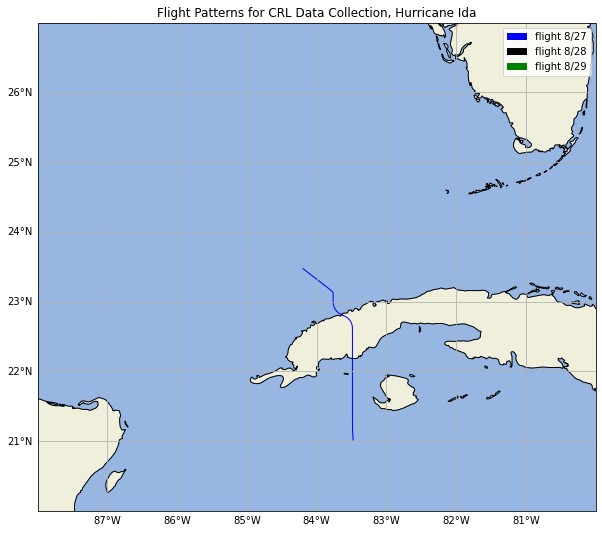

In [20]:
# crl flight path figure Ida

def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # all three flights
    # ax.set_extent([-95, -45, 10, 32], crs=ccrs.PlateCarree())
    # two best flights
    ax.set_extent([-95, -80, 20, 32], crs=ccrs.PlateCarree())

    ax.set_extent([-88, -80, 20, 27], crs=ccrs.PlateCarree())

    
    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    imin = 6900 # 10200
    imax = 8000 # 13213
    
    colors = ['b', 'k', 'g']
    # plot all three flight paths
    for i in range(3):    
        os.chdir( crl_path)
        crl_data = xr.open_dataset( crl_list[i+12])
        lat = crl_data.Lat [ imin: imax]
        lon = crl_data.Lon [ imin: imax]    
        track = sgeom.LineString(zip(lon, lat))
        ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none', edgecolor=colors[i])                          

        
    sam26 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
    sam27 = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    sam29 = mpatches.Rectangle((0, 0), 1, 1, facecolor="g") 
    labels = ['flight 8/27', 'flight 8/28', 'flight 8/29']
    ax.legend([sam26, sam27, sam29], labels)
    
    ax.set_title( "Flight Patterns for CRL Data Collection, Hurricane Ida")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()

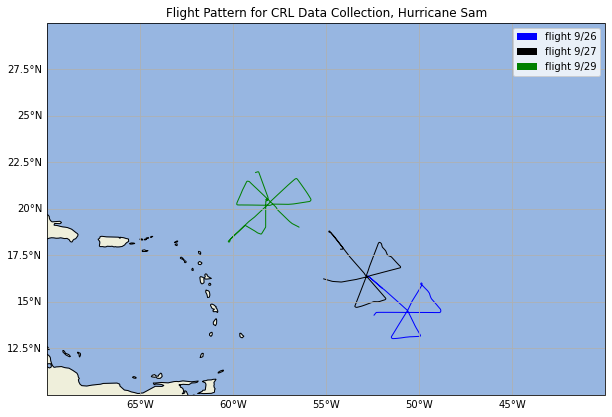

In [6]:
# crl flight path figure Sam

def main():
    fig = plt.figure( figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # zoomed out   
    # ax.set_extent([-80, -40, 10, 40], crs=ccrs.PlateCarree())
    # zoomed in
    ax.set_extent([-70, -40, 10, 30], crs=ccrs.PlateCarree())

    gl = ax.gridlines( draw_labels=True) #, color="k")
    gl.top_labels = False
    gl.right_labels = False

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)

    colors = ['b', 'k', 'g']
    # plot all three flight paths
    for i in range(3):    
        os.chdir( crl_path)
        crl_data = xr.open_dataset( crl_list[i+16])
        lat = crl_data.Lat
        lon = crl_data.Lon    
        track = sgeom.LineString(zip(lon, lat))
        ax.add_geometries([track], ccrs.PlateCarree(),
                          facecolor='none', edgecolor=colors[i])                          

    sam26 = mpatches.Rectangle((0, 0), 1, 1, facecolor="b")
    sam27 = mpatches.Rectangle((0, 0), 1, 1, facecolor="k")
    sam29 = mpatches.Rectangle((0, 0), 1, 1, facecolor="g") 
    labels = ['flight 9/26', 'flight 9/27', 'flight 9/29']
    ax.legend([sam26, sam27, sam29], labels)
    
    ax.set_title( "Flight Pattern for CRL Data Collection, Hurricane Sam")
    ax.set_xlabel( "Longitude (Degrees)")
    ax.set_ylabel( "Latitude (Degrees)")
    plt.show()
    

    
if __name__ == '__main__':
    main()